# Incidence du syndrome grippal

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

Pour vérifier si le document à déjà été téléchargé qu'il n'y a pas besoin de le télécharger à nouveau 

In [50]:
from pathlib import Path
import urllib.request

fichier = Path("incidence-PAY-3.csv")
url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv"

if not fichier.exists():
    urllib.request.urlretrieve(url, fichier)

#data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [51]:
raw_data = pd.read_csv(fichier, skiprows=1)
raw_data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202536          3   26164   20247.0   32081.0     39        30.0   
1     202535          3   23101   17698.0   28504.0     34        26.0   
2     202534          3   21429   16177.0   26681.0     32        24.0   
3     202533          3   16766   12022.0   21510.0     25        18.0   
4     202532          3   19900   14303.0   25497.0     30        22.0   
5     202531          3   18470   12625.0   24315.0     28        19.0   
6     202530          3   19166   14283.0   24049.0     29        22.0   
7     202529          3   18673   13815.0   23531.0     28        21.0   
8     202528          3   23285   18131.0   28439.0     35        27.0   
9     202527          3   21453   17129.0   25777.0     32        26.0   
10    202526          3   21945   17422.0   26468.0     33        26.0   
11    202525          3   23323   18546.0   28100.0     35        28.0   
12    202524          3   23154   18577.0   27731.0     35        28.0   
13    202523          3   24391   19307.0   29475.0     36        28.0   
14    202522          3   18755   14333.0   23177.0     28        21.0   
15    202521          3   23760   18671.0   28849.0     35        27.0   
16    202520          3   20265   15814.0   24716.0     30        23.0   
17    202519          3   16264   12394.0   20134.0     24        18.0   
18    202518          3   18115   13975.0   22255.0     27        21.0   
19    202517          3   22150   17291.0   27009.0     33        26.0   
20    202516          3   28564   22550.0   34578.0     43        34.0   
21    202515          3   35721   29592.0   41850.0     53        44.0   
22    202514          3   37579   31232.0   43926.0     56        47.0   
23    202513          3   39673   33686.0   45660.0     59        50.0   
24    202512          3   52543   45627.0   59459.0     78        68.0   
25    202511          3   59469   52154.0   66784.0     89        78.0   
26    202510          3   60334   53048.0   67620.0     90        79.0   
27    202509          3   84531   74994.0   94068.0    126       112.0   
28    202508          3  136020  124824.0  147216.0    203       186.0   
29    202507          3  208952  195988.0  221916.0    312       293.0   
...      ...        ...     ...       ...       ...    ...         ...   
2102  198521          3   26096   19621.0   32571.0     47        35.0   
2103  198520          3   27896   20885.0   34907.0     51        38.0   
2104  198519          3   43154   32821.0   53487.0     78        59.0   
2105  198518          3   40555   29935.0   51175.0     74        55.0   
2106  198517          3   34053   24366.0   43740.0     62        44.0   
2107  198516          3   50362   36451.0   64273.0     91        66.0   
2108  198515          3   63881   45538.0   82224.0    116        83.0   
2109  198514          3  134545  114400.0  154690.0    244       207.0   
2110  198513          3  197206  176080.0  218332.0    357       319.0   
2111  198512          3  245240  223304.0  267176.0    445       405.0   
2112  198511          3  276205  252399.0  300011.0    501       458.0   
2113  198510          3  353231  326279.0  380183.0    640       591.0   
2114  198509          3  369895  341109.0  398681.0    670       618.0   
2115  198508          3  389886  359529.0  420243.0    707       652.0   
2116  198507          3  471852  432599.0  511105.0    855       784.0   
2117  198506          3  565825  518011.0  613639.0   1026       939.0   
2118  198505          3  637302  592795.0  681809.0   1155      1074.0   
2119  198504          3  424937  390794.0  459080.0    770       708.0   
2120  198503          3  213901  174689.0  253113.0    388       317.0   
2121  198502          3   97586   80949.0  114223.0    177       147.0   
2122  198501          3   85489   65918.0  105060.0    155       120.0   
2123  198452          3   84830   60602.0  109058.0    154       110.0   
2124  198451

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [52]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator inc  inc_low  inc_up inc100  inc100_low  inc100_up  \
1895  198919          3   -      NaN     NaN      -         NaN        NaN   

     geo_insee geo_name  
1895        FR   France

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [53]:
data = raw_data.dropna().copy()
data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202536          3   26164   20247.0   32081.0     39        30.0   
1     202535          3   23101   17698.0   28504.0     34        26.0   
2     202534          3   21429   16177.0   26681.0     32        24.0   
3     202533          3   16766   12022.0   21510.0     25        18.0   
4     202532          3   19900   14303.0   25497.0     30        22.0   
5     202531          3   18470   12625.0   24315.0     28        19.0   
6     202530          3   19166   14283.0   24049.0     29        22.0   
7     202529          3   18673   13815.0   23531.0     28        21.0   
8     202528          3   23285   18131.0   28439.0     35        27.0   
9     202527          3   21453   17129.0   25777.0     32        26.0   
10    202526          3   21945   17422.0   26468.0     33        26.0   
11    202525          3   23323   18546.0   28100.0     35        28.0   
12    202524          3   23154   18577.0   27731.0     35        28.0   
13    202523          3   24391   19307.0   29475.0     36        28.0   
14    202522          3   18755   14333.0   23177.0     28        21.0   
15    202521          3   23760   18671.0   28849.0     35        27.0   
16    202520          3   20265   15814.0   24716.0     30        23.0   
17    202519          3   16264   12394.0   20134.0     24        18.0   
18    202518          3   18115   13975.0   22255.0     27        21.0   
19    202517          3   22150   17291.0   27009.0     33        26.0   
20    202516          3   28564   22550.0   34578.0     43        34.0   
21    202515          3   35721   29592.0   41850.0     53        44.0   
22    202514          3   37579   31232.0   43926.0     56        47.0   
23    202513          3   39673   33686.0   45660.0     59        50.0   
24    202512          3   52543   45627.0   59459.0     78        68.0   
25    202511          3   59469   52154.0   66784.0     89        78.0   
26    202510          3   60334   53048.0   67620.0     90        79.0   
27    202509          3   84531   74994.0   94068.0    126       112.0   
28    202508          3  136020  124824.0  147216.0    203       186.0   
29    202507          3  208952  195988.0  221916.0    312       293.0   
...      ...        ...     ...       ...       ...    ...         ...   
2102  198521          3   26096   19621.0   32571.0     47        35.0   
2103  198520          3   27896   20885.0   34907.0     51        38.0   
2104  198519          3   43154   32821.0   53487.0     78        59.0   
2105  198518          3   40555   29935.0   51175.0     74        55.0   
2106  198517          3   34053   24366.0   43740.0     62        44.0   
2107  198516          3   50362   36451.0   64273.0     91        66.0   
2108  198515          3   63881   45538.0   82224.0    116        83.0   
2109  198514          3  134545  114400.0  154690.0    244       207.0   
2110  198513          3  197206  176080.0  218332.0    357       319.0   
2111  198512          3  245240  223304.0  267176.0    445       405.0   
2112  198511          3  276205  252399.0  300011.0    501       458.0   
2113  198510          3  353231  326279.0  380183.0    640       591.0   
2114  198509          3  369895  341109.0  398681.0    670       618.0   
2115  198508          3  389886  359529.0  420243.0    707       652.0   
2116  198507          3  471852  432599.0  511105.0    855       784.0   
2117  198506          3  565825  518011.0  613639.0   1026       939.0   
2118  198505          3  637302  592795.0  681809.0   1155      1074.0   
2119  198504          3  424937  390794.0  459080.0    770       708.0   
2120  198503          3  213901  174689.0  253113.0    388       317.0   
2121  198502          3   97586   80949.0  114223.0    177       147.0   
2122  198501          3   85489   65918.0  105060.0    155       120.0   
2123  198452          3   84830   60602.0  109058.0    154       110.0   
2124  198451

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [54]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [55]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [56]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


Un premier regard sur les données !

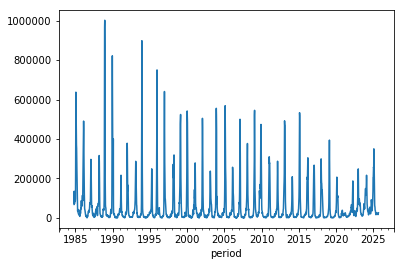

In [57]:
sorted_data['inc'].astype(float).plot()

In [58]:
print(sorted_data['inc'].head())
print(sorted_data['inc'].dtype)

period
1984-10-29/1984-11-04     68422
1984-11-05/1984-11-11    135223
1984-11-12/1984-11-18     87330
1984-11-19/1984-11-25     72029
1984-11-26/1984-12-02     78620
Freq: W-SUN, Name: inc, dtype: object
object


Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

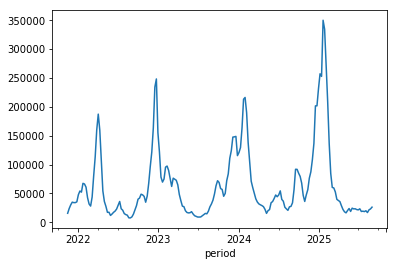

In [59]:
sorted_data['inc'].astype(float).iloc[-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [69]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [71]:
print (first_august_week)

[Period('1985-07-29/1985-08-04', 'W-SUN'), Period('1986-07-28/1986-08-03', 'W-SUN'), Period('1987-07-27/1987-08-02', 'W-SUN'), Period('1988-08-01/1988-08-07', 'W-SUN'), Period('1989-07-31/1989-08-06', 'W-SUN'), Period('1990-07-30/1990-08-05', 'W-SUN'), Period('1991-07-29/1991-08-04', 'W-SUN'), Period('1992-07-27/1992-08-02', 'W-SUN'), Period('1993-07-26/1993-08-01', 'W-SUN'), Period('1994-08-01/1994-08-07', 'W-SUN'), Period('1995-07-31/1995-08-06', 'W-SUN'), Period('1996-07-29/1996-08-04', 'W-SUN'), Period('1997-07-28/1997-08-03', 'W-SUN'), Period('1998-07-27/1998-08-02', 'W-SUN'), Period('1999-07-26/1999-08-01', 'W-SUN'), Period('2000-07-31/2000-08-06', 'W-SUN'), Period('2001-07-30/2001-08-05', 'W-SUN'), Period('2002-07-29/2002-08-04', 'W-SUN'), Period('2003-07-28/2003-08-03', 'W-SUN'), Period('2004-07-26/2004-08-01', 'W-SUN'), Period('2005-08-01/2005-08-07', 'W-SUN'), Period('2006-07-31/2006-08-06', 'W-SUN'), Period('2007-07-30/2007-08-05', 'W-SUN'), Period('2008-07-28/2008-08-03', '

In [78]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)


Voici les incidences annuelles.

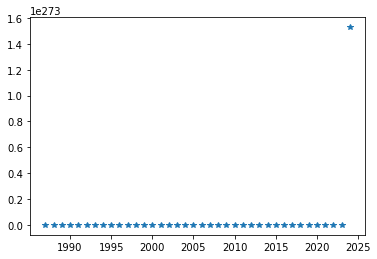

In [79]:
import pandas as pd

yearly_incidence = pd.Series(yearly_incidence, index=year)
yearly_incidence = pd.to_numeric(yearly_incidence, errors='coerce')

if yearly_incidence.empty or yearly_incidence.isnull().all():
    print("yearly_incidence est vide ou contient uniquement des valeurs non numériques.")
else:
    yearly_incidence.plot(style='*')


Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [80]:
yearly_incidence.sort_values()

2007    1.773002e+233
2019    2.048184e+234
2017    3.691210e+235
1994    4.055416e+237
1991    8.811399e+238
2014    2.270471e+239
2021    3.144207e+240
2002    1.899900e+242
1997    3.010145e+242
2020    2.337159e+243
1992    2.464625e+243
2012    2.409259e+244
2004    5.164162e+244
2008    1.965132e+245
2009    3.972438e+245
2011    3.989273e+245
2003    5.455109e+245
2018    3.256267e+246
2015    4.143323e+246
1993    4.233496e+246
1989    8.758703e+246
2000    1.478264e+247
1990    2.721711e+247
2006    3.767157e+247
1996    1.946701e+248
2001    2.159141e+249
2013    2.696638e+249
1999    1.214713e+250
2016    2.845159e+250
1995    5.027479e+250
2005    2.949350e+251
1998    1.386209e+254
2010    3.025523e+254
1988    8.233722e+256
1987    2.247103e+258
2023    1.325712e+259
2022    8.567107e+262
2024    1.528615e+273
1986              NaN
dtype: float64

In [81]:
print(yearly_incidence)

1986              NaN
1987    2.247103e+258
1988    8.233722e+256
1989    8.758703e+246
1990    2.721711e+247
1991    8.811399e+238
1992    2.464625e+243
1993    4.233496e+246
1994    4.055416e+237
1995    5.027479e+250
1996    1.946701e+248
1997    3.010145e+242
1998    1.386209e+254
1999    1.214713e+250
2000    1.478264e+247
2001    2.159141e+249
2002    1.899900e+242
2003    5.455109e+245
2004    5.164162e+244
2005    2.949350e+251
2006    3.767157e+247
2007    1.773002e+233
2008    1.965132e+245
2009    3.972438e+245
2010    3.025523e+254
2011    3.989273e+245
2012    2.409259e+244
2013    2.696638e+249
2014    2.270471e+239
2015    4.143323e+246
2016    2.845159e+250
2017    3.691210e+235
2018    3.256267e+246
2019    2.048184e+234
2020    2.337159e+243
2021    3.144207e+240
2022    8.567107e+262
2023    1.325712e+259
2024    1.528615e+273
dtype: float64


Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

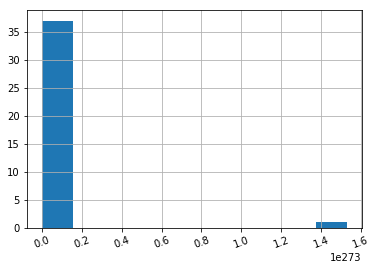

In [83]:
yearly_incidence.hist(xrot=20)